<a href="https://colab.research.google.com/github/borisburd/Prueba1/blob/master/Trabajo%20fisica%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 TRABAJO PRÁCTICO NUMÉRICO 1

 Integrantes: Boris Burd e Ingrid Haag





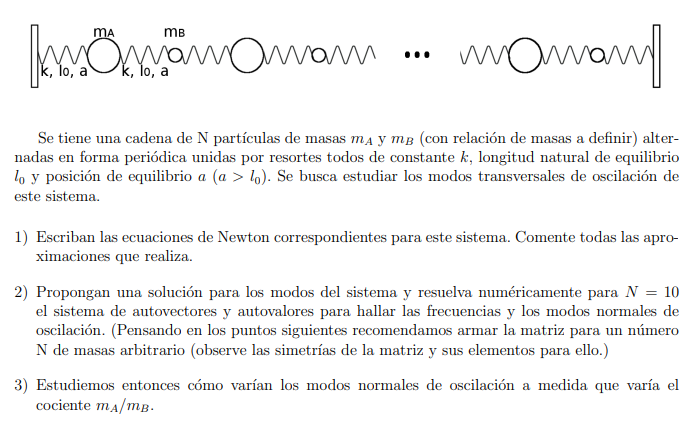

# Primera parte 
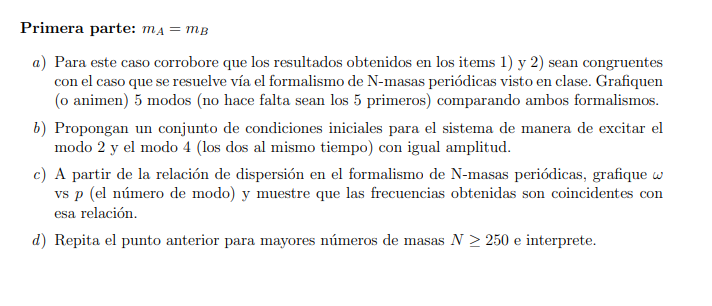

# Punto 1 

Se observa en principio que todas las masas $m{_{a}}$, tendran una misma ecuacion de 
movimiento exceptuando la primera. 
Análogamente, todas las masas $m{_{b}}$ tendrán la misma ecuación de movimiento exceptuando a la última. \\

A su vez podemos decir que las masas $m{_{a}}$ se ubican en las posiciones impares y las masas $m{_{b}}$ en las pares \\

\\

Para esto diferenciamos cada caso: \\


*    **Para la  masa "1"** (llamamos así a la primera masa $m{_{a}}$): \\

\\

$ \psi_{1}m_{a}= -k\psi_1-k(\psi_{1}-\psi_{2}) $ 

  \\
 
*   **Para la  masa "N"** (llamamos así a la última masa $m{_{b}}$):

\\

$ \psi_{N}m_{b}= -k\psi_N-k(\psi_{N}-\psi_{N-1}) $ 

\\

*   **Para una masa par genérica** (llamamos  $\psi{_{np}}$ a las masas pares) :

\\

$ \psi_{np}m_{b}= -k(\psi_{np}-\psi_{np-1})-k(\psi_{np}-\psi_{np+1}) $ 

 \\

*   **Para una masa impar genérica** (llamamos  $\psi{_{ni}}$ a las masas impares) :

\\

$ \psi_{ni}m_{a}= -k(\psi_{ni}-\psi_{ni-1})-k(\psi_{ni}-\psi_{ni+1}) $ 

 \\


Además buscamos estudiar el movimiento transversal, por lo cual se debe descomponer la fuerza eslástica k para dichos movimientos :



\\



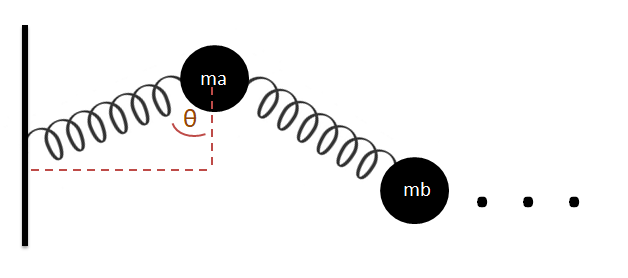

Para una fuerza elástica genérica del sistema tengo que 

$Fe=k(h-l_{0})cos(\theta )=k(h-l_{0})\frac{\Delta \psi }{h}= k (1-\frac{l_{0}}{h})\Delta \psi $

Siendo $h$ la longitud del resorte

$h=\sqrt{(\Delta \psi)^{2}+l^{2}}$ 

Donde por aproximación de pequeñas oscilaciones, haciendo el Taylor, me queda:

$h={l}$ 

\\
Finalmente me queda que la Fuerza elástica es igual a:

\\
$Fe= k (1-\frac{l_{0}}{l}) \Delta \psi $

Definimos entonces por comodidad:

\\
$\tilde{k}=k (1-\frac{l_{0}}{l})$


Redefino mis ecuaciones para movimiento transversal para todas las masas (los extremos están contenidos): 
 
$ \ddot{\psi }_{np}= -2\psi_{np}\frac{\tilde{k}}{m_{b}}+\psi_{np-1}\frac{\tilde{k}}{m_{b}}+\psi_{np+1}\frac{\tilde{k}}{m_{b}}$    (1)

$ \ddot{\psi }_{ni}= -2\psi_{ni}\frac{\tilde{k}}{m_{a}}+\psi_{ni-1}\frac{\tilde{k}}{m_{a}}+\psi_{ni+1}\frac{\tilde{k}}{m_{a}}$ (2)

Y así se obtienen  las ecuaciones de movimiento.




# Punto 2

Propongo la siguiente solucion (pensando que estamos en modos normales): \\

 $\psi_n^{(p)}(x,t)=A^{(p)}v^{(p)}_ncos(w^{(p)}t+\phi^{(p)}) $
 
donde cada masa tendrá asignada su relación de amplitud por el autovector de cada modo. $A$ y $\phi$ a determinar por las condiciones iniciales. ($v_n^{(p)}$ es la coordenada n del autovector en el modo p). 

Para resolver el problema necesitamos armarnos la matriz del sistema, la cual a través de las ecuaciones de movimiento queda:

![picture](https://drive.google.com/uc?export=view&id=1Y4xLr7LsaHOuVZOHssGt1hCHLW70ILt9)


Buscamos resolver el problema para $N=10$ en particular. Nos armamos esta matriz de forma númerica, para así hallar autovalores y autovectores y resolver el movimiento de cada masa.


In [ ]:
#importo liberarías
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
#Defino constantes
ma = 1 #kg
mb = 1 #kg
l0 = 1 #m
a = 3 #m #a > l0
k_resorte = 2 #N/m
k = k_resorte*(1-l0/a) #k moño pero llamo k por comodidad
N = 10 #Cantidad de masitas
A = 1 #amplitud
phi = 0 #fase inicial

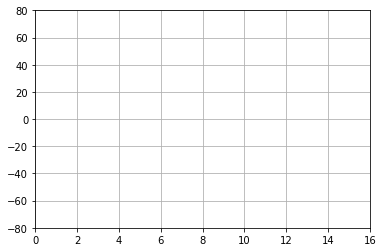

In [ ]:
t = np.linspace(0,16,200) #array de tiempos

plt.rcParams['axes.grid'] = True #tener grid para todo ploteo
#armo gráfico para el futuro
fig,  ax= plt.subplots()
 
ax.set_xlim((0,16));
ax.set_ylim((-80, 80));
ax.grid(True);


In [ ]:
def metodo_matricial(N, ma, mb, k_resorte): #esta función calcula la matriz del sistema dada la cantidad de masas, masa a, masa b y constante del resorte. Luego, calcula autovalores y autovectores y los devuelve.
  k = k_resorte*(1 - l0/a) #este es el k moño pero lo escribo como k para que sea más comodo
  M = np.zeros((N,N)) #matriz para resolver determinante y hallar w^2
  for i in range(1,N-1):
    if i<N:
      if i%2: #esto me devuelve true si i es impar
        M[i,i-1] = -k/mb
        M[i,i] = 2*k/mb
        M[i,i+1] = -k/mb
      else: #caso i = par
        M[i,i-1] = -k/ma
        M[i,i] = 2*k/ma
        M[i,i+1] = -k/ma
  #defino la primera fila a mano (siempre es así independientemente del tamaño de la matriz)
  M[0,0] = 2*k/ma
  M[0,1] = -k/ma
  #defino ultima fila de la matriz en función de si es par o impar (similar a como está hecho antes)
  if i%2:
    M[N-1,N-1] = 2*k/ma
    M[N-1,N-2] = -k/ma
  else:
    M[N-1,N-1] = 2*k/mb
    M[N-1,N-2] = -k/mb

  w_2, v = np.linalg.eig(M) #busco autovalores w_2 y autovectores v (recordar que los autovalores son w al cuadrado)
   #ordeno autovalores y autovectores de menor a mayor (codigo de Maga <3)
  idx = (-w_2).argsort()[::-1] 
  w_2 = w_2[idx]
  v = v[:,idx]
  w = np.sqrt(w_2)
  return(w, v) #devuelve frecuencias naturales, y matriz autovectores como columnas

In [ ]:
diez_masitas_alternadas = metodo_matricial(10, 1.5, 1, 2) #uso la función que definí arriba para N=1, ma=1.5,mb=1, k=2
print(diez_masitas_alternadas) #acá se ven las frecuencias, y los autovectores como columnas (aunque siendo tantos es dificil entenderlos a simple vista)

(array([0.29384035, 0.5808537 , 0.85364834, 1.10201324, 1.29631091,
       1.66253496, 1.79722321, 1.92762262, 2.02658664, 2.08760683]), array([[ 0.12063682, -0.23482089, -0.33855863, -0.43612747,  0.55706547,
         0.14831797,  0.24864337, -0.23468464,  0.17614457,  0.09368843],
       [ 0.22955558, -0.38051202, -0.39956522, -0.27640131,  0.06101276,
        -0.16456254, -0.40622426,  0.51165829, -0.46157541, -0.27196487],
       [ 0.32360911, -0.42991714, -0.24219479,  0.13507804, -0.51193534,
        -0.13630213, -0.07701019, -0.16788642,  0.32249077,  0.25131988],
       [ 0.38622889, -0.31614081,  0.11372812,  0.36200873, -0.11708262,
         0.3157932 ,  0.53204064, -0.14563313, -0.38349071, -0.45758282],
       [ 0.4238378 , -0.12236718,  0.40749445,  0.25921286,  0.42533125,
         0.1132439 , -0.14778147,  0.2824701 ,  0.09179044,  0.32915904],
       [ 0.42027725,  0.11785274,  0.36719483, -0.19772929,  0.16366715,
        -0.44144017, -0.29060078, -0.47020678,  0.14295

Obtuvimos autovalores y autovectores de nuestro sistema.

De esta manera reemplazando en la solución propuesta los datos obtenidos podemos escribir los modos de cada masa. Por ejemplo para la masa 1 en modo 1 tenemos:

In [ ]:
print("frecuencia del modo 1:", diez_masitas_alternadas[0][0])
print("primera coordenada autovector 1:", diez_masitas_alternadas[1][0,0])

w_1: 0.2938403478701368
primera coordenada autovector 1: 0.12063681532386472


Entonces el modo 1 de la masa 1 sería:

$\psi_1^{(1)}(x,t)=A^{(1)}0.12\hspace{1 mm}cos\hspace{1 mm}(0.29\hspace{1 mm}t+\phi^{(1)}) $

Se puede realizar el mismo procedimiento para el resto de modos y masas.

# Punto 3

Buscamos graficar los modos normales usando el formalismo de N masas periódicas y los hallados vía método matricial para ver si coinciden. Empezamos graficando a partir del método de N masas. La ecuación movimiento de ellas es:

$\psi_n(x,t)^{(p)}=A^{(p)}cos(\kappa^{(p)}na+\alpha)cos(w^{(p)}t+\phi^{(p)})$

Estamos en caso de extremos fijos por lo que los $\kappa^{(p)}$ y los $\alpha^{(p)}$ son: 

$\kappa^{(p)} = \frac{p\pi}{(N+1)a}$ , $\alpha^{(p)} = \frac{\pi}{2}$



y las frecuencias vienen dadas por la relación de dispersión que es:

${w^{(p)}}^2 = 4\frac{k}{m}sin^2(\frac{\kappa^{(p)}a}{2})$

Reemplazando $\kappa^{(p)}$:

${w^{(p)}}^2 = 4\frac{k}{m}sin^2(\frac{p\pi}{2(N+1)})$

Luego los modos vienen dados por:

$\psi_n(x,t)^{(p)}=A^{(p)}sin(\frac{p\pi\hspace{1 mm}n}{(N+1)})cos(4\frac{k}{m}sin^2(\frac{\kappa^{(p)}a}{2})t+\phi^{(p)})$

Con $A^{(p)}$ y $\phi^{(p)}$ a determinar por condiciones iniciales.


Programamos esto y graficamos el movimiento de cada una de las 10 masas para los primeros 5 modos.

a)

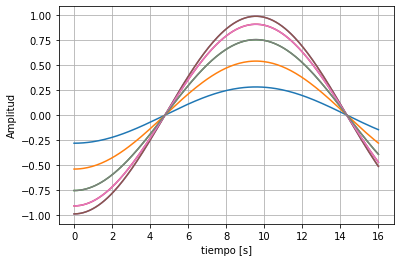

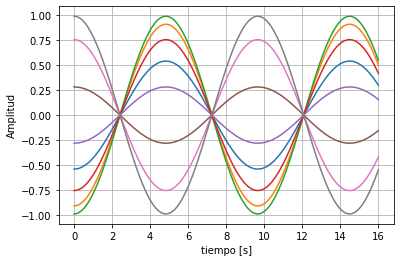

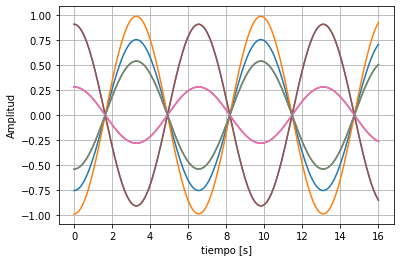

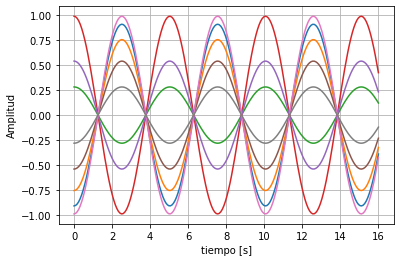

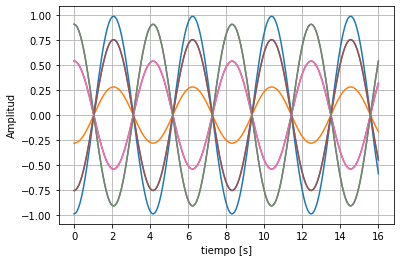

In [ ]:
#ma = mb #uso ma pq es indistinto
No = 10
ma = 1
mb = 1
lista_wp = [] #FRECUENCIAS NATURALES CON MÉTODO MATRICIAL
lista_kp = []
v_modo = []
#lleno listas de wp y kp con frecuencias y kps de los 10 modos
for i in range(1,No+1):
  k_p = (i*np.pi)/((No+1)*a) #kp de extremos fijos
  w_p = 2*np.sqrt(k/ma)*abs(np.sin(k_p*a/2)) #rel de dispersión
  lista_kp.append(k_p) 
  lista_wp.append(w_p)

colors = ["b","g","r","c","m","y","k","#7d1791", "#208291","#918220" ] 
#grafico para 5 modos, el mov de las 10 masas
for j in range(5):
  plot1 = plt.figure(1)
  plt.xlabel("tiempo [s]")
  plt.ylabel("Amplitud")
  for i in range(1,N-1):
      plt.plot(t, A*np.cos(lista_kp[j]*i*a+np.pi/2)*np.cos(lista_wp[j]*t+phi)) 
  plt.show()

In [ ]:
print("Frecuencias método matricial:", w_diez)
print("Frecuencias método N masitas:", lista_wp)

Frecuencias método matricial: [0.32866204 0.65063347 0.95935988 1.24855649 1.51233608 1.74532888
 1.94279181 2.10070511 2.21585411 2.2858947 ]
Frecuencias método N masitas: [0.328662040747037, 0.6506334701275239, 0.9593598783282041, 1.2485564859715546, 1.5123360841001052, 1.7453288807735046, 1.9427918145472245, 2.1007051095257108, 2.2158541064075385, 2.2858947036784802]


Como se ve en estos prints, las frecuencias coinciden con ambos métodos. Ahora vemos los gráficos para corroborar que los autovectores tambíen coinciden y en definitva, el movimiento.

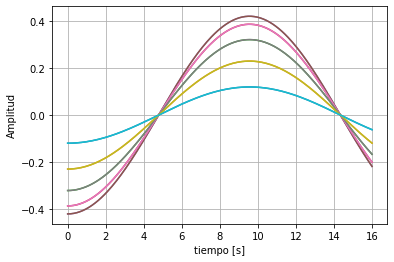

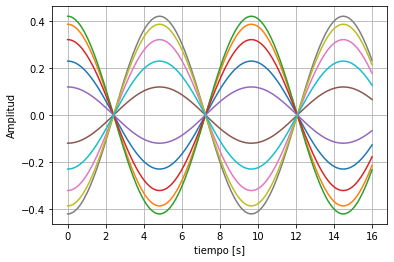

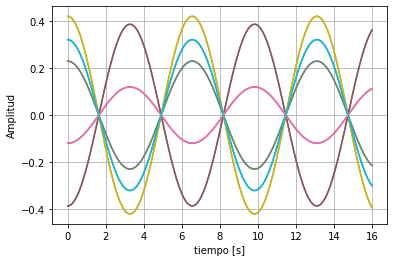

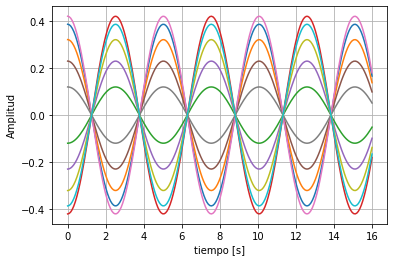

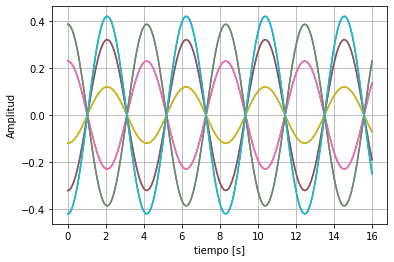

<Figure size 432x288 with 0 Axes>

In [ ]:
w_diez, v_diez = metodo_matricial(10, 1, 1, 2) 
for j in range(5):
  plot1 = plt.figure(1)
  plt.xlabel("tiempo [s]")
  plt.ylabel("Amplitud")
  for i in range(N):
      plt.plot(t, A*v_diez[i,j]*np.cos(w_diez[j]*t+phi)) 
  plt.show()
plot2 = plt.figure(2)

No lo pusimos en los gráficos para que no estén sobrecargados pero cada linea es el desplazamiento de cada masa respecto al origen.

Notar que los gráficos con ambos formalismos dan lo mismo, a diferencia de un factor multiplicativo que reescala los gráficos de uno respecto del otro. Esto es por haber fijado la misma amplitud $A$ en ambos métodos, cuando en realidad, habría que determinarla con las condiciones iniciales y así sí coincidirían los gráficos.

b)

El movimiento más general para excitar el modo 2 y el modo 4 es combinación lineal de ambos modos normales.

$\psi_n(x,t)=Av^{(2)}_ncos(w^{(2)}t+\phi)+Bv^{(4)}_ncos(w^{(4)}t+\Phi) \tag{1}$

Tomando misma amplitud para ambos modos:

$\psi_n(x,t)=Av^{(2)}_ncos(w^{(2)}t+\phi)+Av^{(4)}_ncos(w^{(4)}t+\Phi) \tag{2}$

Para excitar un modo normal de oscilación, basta con colocar las masas respetando la relación de amplitudes dada por los autovectores de dicho modo y dar velocidad inicial nula. Tambiíen se puede lograr imponiendo posición inicial cero y que las velocidades respeten el autovector (consideramos velocidad inicial cero).

Derivamos posición:

$\dot{\psi}_n(x,t)=-w^{(2)}Av^{(2)}_nsin(w^{(2)}t+\phi)-w^{(4)}Av^{(4)}_nsin(w^{(4)}t+\Phi) \tag{3}$

Igualamos a cero a $t=0$:

$-w^{(2)}Av^{(2)}_nsin(\phi)-w^{(4)}Av^{(4)}_nsin(\Phi)=0 \tag{4}$

La unica forma de que esto se cumpla es si ambas fases temporales inciales son cero ya que ni las amplitudes ni las frecuencias temporales lo son. (no habría movimiento).

$\phi = \Phi = 0 \tag{5}$

Reescribiendo $(2)$ y reemplazando $t=0$:

$\psi_n(x,0)=Av_n^{(2)}+Av_n^{(4)}$

A fin de cuentas, las posiciones iniciales de cada masa respetan la suma de los autovectores en juego de los modo excitados.

c)

La relación de dispersión como ya hemos usado antes es:

$\omega^{(p)^2}=4\frac{\tilde{k}}{m}sin^2(\frac{\kappa^{(p)}a}{2})\tag{6} $

La fase espacial para extremos fijos viene dada por: 

$\kappa=\frac{p\pi}{(N+1)a}\tag{7}$

Por lo tanto reemplazando (7) en (6) me queda que :

$\omega^{(p)^2}=4\frac{\tilde{k}}{m}sin^2(\frac{p\pi}{2(N+1)})$

\\

Al graficarlo obtenemos lo siguiente:

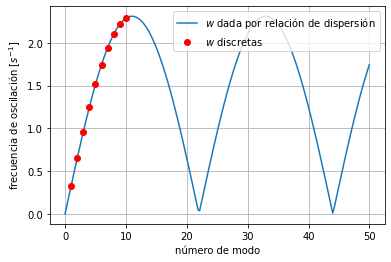

In [ ]:
p=np.linspace(0,50,200)
#grafica rel de dispersión
k_p = (p*np.pi)/((No+1)*a)
w_p = 2*np.sqrt(k/ma)*abs(np.sin(k_p*a/2))
plt.plot(p,w_p, label='$w$ dada por relación de dispersión')

for i in range(1,No+1): #grafica los 10 modos
  puntos, = plt.plot(i,w_diez[i-1],'ro')
plt.xlabel("número de modo")
puntos.set_label('$w$ discretas')
plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
plt.legend(loc=1)

La linea celeste representa un gráfico que realizamos de forma continua para las frecuencias naturales en función de los modos. Sin embargo, sabemos que las frecuencias son discretas y que solo tendrán sentido físico aquellas que tengan $p$ contenido en los números enteros. \\
Al graficar estas frecuencias (puntos rojos), notamos que están dispuestas en torno al gráfico continuo, lo cual esperábamos desde un principio. Es importante aclarar que, por más que el gráfico de $w$ en funcion de $p$ sea periódico (por ser de la forma $sin^2(x)$), pasado el $p=N$ (con $N = 10$ en este caso), ya no tienen sentido el resto de frecuencias, al haber superado el modo máximo de oscilación.

d)

In [ ]:
n250 = 250 #defino cantidad de masas como 250
w_250, v_250 = metodo_matricial(n250, 1, 1, 2) #llamo a función que resuelve sistema matricial pero esta vez con 250 masas

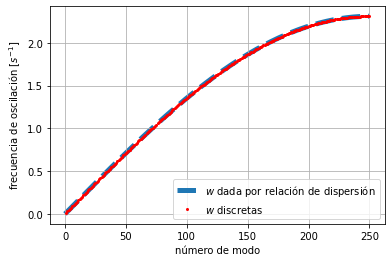

In [ ]:
p_2 = np.linspace(0,250,600)
#graficar rel de dispersión para 250 masas
k_p_250 = (p_2*np.pi)/((n250+1)*a)
w_p_250 = 2*np.sqrt(k/ma)*abs(np.sin(k_p_250*a/2))
plt.plot(p_2,w_p_250,ls ="--" ,label='$w$ dada por relación de dispersión', lw=5, zorder = 1)

for i in range(1,n250+1): #grafica los 250 modos
  puntos, = plt.plot(i,w_250[i-1],'ro', markersize=2, zorder = 2)

plt.xlabel("número de modo")
puntos.set_label('$w$ discretas')
plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
plt.legend(loc=0)

Ahora para un número de masas considerablemente mayor, se ve cómo se llega al caso continuo. Esto es muy práctico ya que se obtiene la relación de dispersión de forma no analítica, la cuál llevaría un desarrollo matemático mayor y molesto.

# Segunda parte
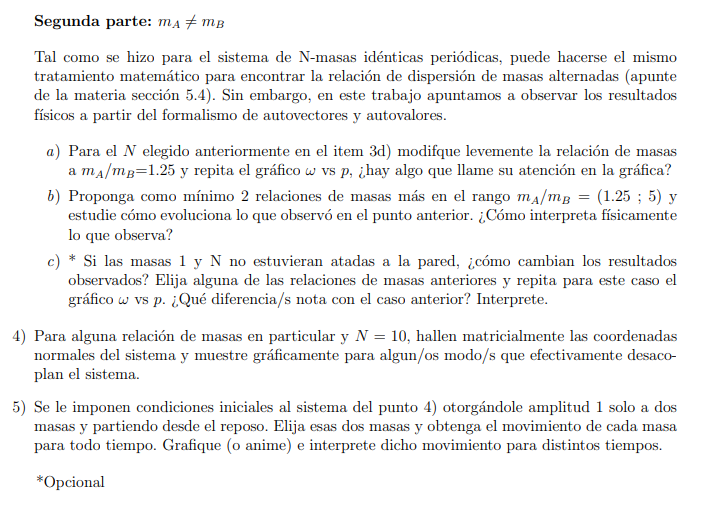

 a) y b)

In [ ]:
w_masas_distintas, v_masas_distintas = metodo_matricial(n250, 1.25, 1, 2)

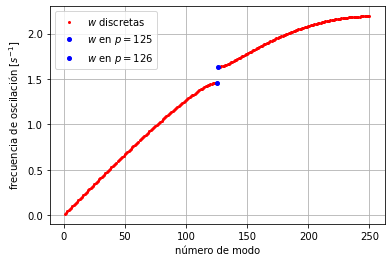

In [ ]:
for i in range(1,n250+1): #grafica los 250 modos
  puntos, = plt.plot(i,w_masas_distintas[i-1],'ro', markersize=2, zorder = 2)

plt.xlabel("número de modo")
puntos.set_label('$w$ discretas')
plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
punto1 = plt.plot(125,w_masas_distintas[124],'bo', markersize=4, zorder = 2, label="$w$ en $p=125$")
punto2 = plt.plot(126,w_masas_distintas[125],'bo', markersize=4, zorder = 2, label="$w$ en $p=126$")
plt.legend(loc=0)

Esperabamos ver una relación de dispersión distinta al caso de $ma = mb$, sin embargo, no esperabamos ver una discontinuidad. 
Se ve que esta ocurre al pasar del modo $p =125$ al de $p = 126$. Vamos ver qué pasa cuando cambiamos la relación de masas:

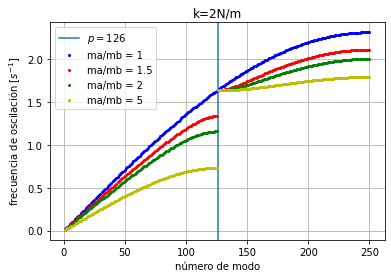

In [ ]:
frec0 = metodo_matricial(n250,1,1,2)
frec1 = metodo_matricial(n250, 1.5, 1, 2)
frec2 = metodo_matricial(n250, 2, 1, 2)
frec3 = metodo_matricial(n250, 5, 1, 2)
lista_frecs = [frec0,frec1,frec2,frec3]
tipos_de_plot = ["bo","ro","go","yo"]
lista_labels = ["ma/mb = 1","ma/mb = 1.5","ma/mb = 2","ma/mb = 5" ]
plt.title("k=2N/m")
plt.axvline(x=126, label ="$p =126$") #grafico linea vertical en cierto p
for j in range(4):
  for i in range(1,n250+1): #grafica los 10 modos
    puntos, = plt.plot(i,lista_frecs[j][0][i-1],tipos_de_plot[j], markersize=2, zorder = 2)
  plt.xlabel("número de modo")
  puntos.set_label('{}'.format(lista_labels[j]))
  plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
  plt.legend(loc=0)

Haciendo este gráfico, se puede ver que el salto se produce siempre al pasar al modo $126$, independientemente de la relación de masas. Lo que sí se observa es que,  al aumentar la relación entre masas el salto es mayor, aunque siempre la frecuencia justo después del salto es la misma. Queremos ver si el salto siempre se produce en $p = \frac{N}{2}+1$, entonces vemos que pasa para $N=300$.

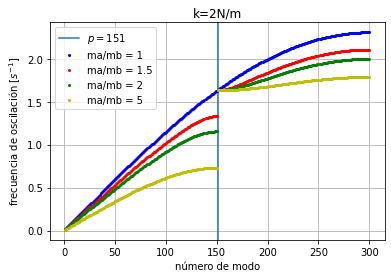

In [ ]:
n300 = 300
frec0 = metodo_matricial(n300,1,1,2)
frec1 = metodo_matricial(n300, 1.5, 1, 2)
frec2 = metodo_matricial(n300, 2, 1, 2)
frec3 = metodo_matricial(n300, 5, 1, 2)
lista_frecs = [frec0,frec1,frec2,frec3]
tipos_de_plot = ["bo","ro","go","yo"]
lista_labels = ["ma/mb = 1","ma/mb = 1.5","ma/mb = 2","ma/mb = 5" ]
plt.axvline(x=151, label ="$p =151$") #grafico linea vertical en cierto p
for j in range(4):
  for i in range(1,n300+1): #grafica los 10 modos
    puntos, = plt.plot(i,lista_frecs[j][0][i-1],tipos_de_plot[j], markersize=2, zorder = 2)
  plt.xlabel("número de modo")
  plt.title("k=2N/m")
  puntos.set_label('{}'.format(lista_labels[j]))
  plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
  plt.legend(loc=0)

Para $N=300$ también se corrobora, y suponemos que se confirma para todo $N$. De todas formas queremos ver si esto se altera al modificar la constante elástica del resorte (por ejemplo para $k=6\frac{N}{m}$).

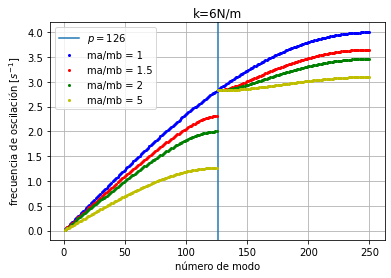

In [ ]:
#k = 6N/m
#N = 300
frec0 = metodo_matricial(n250,1,1,6)
frec1 = metodo_matricial(n250, 1.5, 1, 6)
frec2 = metodo_matricial(n250, 2, 1, 6)
frec3 = metodo_matricial(n250, 5, 1, 6)
lista_frecs = [frec0,frec1,frec2,frec3]
tipos_de_plot = ["bo","ro","go","yo"]
lista_labels = ["ma/mb = 1","ma/mb = 1.5","ma/mb = 2","ma/mb = 5" ]
plt.axvline(x=126, label ="$p =126$") #grafico linea vertical en cierto p
for j in range(4):
  for i in range(1,n250+1): #grafica los 10 modos
    puntos, = plt.plot(i,lista_frecs[j][0][i-1],tipos_de_plot[j], markersize=2, zorder = 2)
  plt.xlabel("número de modo")
  plt.title("k=6N/m")
  puntos.set_label('{}'.format(lista_labels[j]))
  plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
  plt.legend(loc=0)

Vemos que el salto ocurre en el mismo lugar independientemente de la constante elástica, solo cambia a qué frecuencia ocurre. En denfinitiva, hay una región de frecuencias prohibidas a las que no podrá oscilar el sistema, que aumenta proporcionalmente a la relación de masas.

Algo que nos llama la atención es que la discontinuidad ocurre en:

 $\frac{N}{\text{cantidad de masas alternadas}+1}$

 Será siempre así? Veamos qué ocurre si tenemos un sistema de 3 masas alternadas: (esto no se lo esperaban probablemente pero nos dio mucha curiosidad)

 La matriz del sistema será igual a la de 2 masas alternadas solo que cada 2 filas habrá una que tenga una masa C dividiendo y la última dependerá del tamaño de la matriz.

![picture](https://drive.google.com/uc?export=view&id=1Ytm2-r4Tm-DLUl37Ep4KP5FYkcb_JA2e)

In [ ]:
#es la misma función del punto 2 modificada un poco
def metodo_matricial_3_masas(N,ma,mb,mc,k_resorte):
  k = k_resorte*(1 - l0/a) 
  Z = np.zeros((N,N))
  for i in range(1,N-1):
      if i<N:
        if i%3==1: #caso 1,4,7,...
          Z[i,i-1] = -k/mb
          Z[i,i] = 2*k/mb
          Z[i,i+1] = -k/mb
        elif i%3==2: #caso 2,5,8,11,...
          Z[i,i-1] = -k/mc
          Z[i,i] = 2*k/mc
          Z[i,i+1] = -k/mc
        else: #caso 3,6,9,12,...
          Z[i,i-1] = -k/ma
          Z[i,i] = 2*k/ma
          Z[i,i+1] = -k/ma
  #añadimos primera fila a mano
  Z[0,0] = 2*k/ma 
  Z[0,1] = -k/ma
  #añadimos ultima fila dependiendo del tamaño de la matriz
  if N%3==0:
    Z[N-1,N-1] = 2*k/mc
    Z[N-1,N-2] = -k/mc
  elif N%3==1:
    Z[N-1,N-1] = 2*k/ma
    Z[N-1,N-2] = -k/ma
  else:
    Z[N-1,N-1] = 2*k/mb
    Z[N-1,N-2] = -k/mb
#autovalores y autovect como antes
  ww_2, vv = np.linalg.eig(Z)
  idx = (-ww_2).argsort()[::-1]
  ww_2 = ww_2[idx]
  vv = vv[:,idx]
  ww = np.sqrt(ww_2)
  return(ww, vv)

In [ ]:
w_3_masas,v_3_masas = metodo_matricial_3_masas(n300,1,2,3,2)

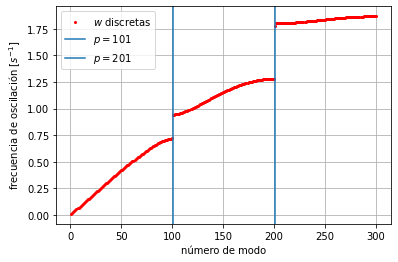

In [ ]:
for i in range(1,n300+1): #grafica los 250 modos
  puntos, = plt.plot(i,w_3_masas[i-1],'ro', markersize=2, zorder = 2)
plt.xlabel("número de modo")
puntos.set_label('$w$ discretas')
plt.ylabel("frecuencia de oscilación [$s^{-1}$]")
plt.axvline(x=101, label ="$p =101$") #grafico linea vertical en cierto p
plt.axvline(x=201, label ="$p =201$") #grafico linea vertical en cierto p
plt.legend(loc=0)

Y como predijimos antes, los saltos de frecuencias ocurren cada N por cantidad de masas alternadas!!!

# Punto 4

Las coordenadas normales se obtienen de la siguiente ecuación:

$\Phi = D^{-1}\psi$

Donde $D$ es la matriz de autovectores como columnas. Esto expandido queda:

$\begin{pmatrix}
\Phi_1\\ 
\Phi_2\\ 
\vdots\\ 
\Phi_N\\
\end{pmatrix}
=
\begin{pmatrix}
\mid  & \mid  & \mid \\
v_1 &v_2 &v_3 &\\
\mid  & \mid  & \mid \\
\end{pmatrix}^{-1}
\begin{pmatrix}
\psi_1^{(1)}+\psi_1^{(2)}+\dots+\psi_1^{(n)}\\ 
\psi_2^{(1)}+\psi_2^{(2)}+\dots+\psi_2^{(n)}\\ 
\vdots\\ 
\psi_N^{(1)}+\psi_N^{(2)}+\dots+\psi_N^{(n)}\\ 
\end{pmatrix}$

Proponiendo que solo se excita el modo 1 y el 2, tenemos:

$\begin{pmatrix}
\Phi_1\\ 
\Phi_2\\ 
\vdots\\ 
\Phi_N\\
\end{pmatrix}
=
\begin{pmatrix}
a & b & \dots &c \\
d &e &\dots &f\\
&\vdots\\
g&h&\dots&i
\end{pmatrix}
\begin{pmatrix}
\psi_1^{(1)}+\psi_1^{(2)}+0+\dots+0\\ 
\psi_2^{(1)}+\psi_2^{(2)}+0+\dots+0\\ 
\vdots\\ 
\psi_N^{(1)}+\psi_N^{(2)}+0+\dots+0\\ 
\end{pmatrix}$

$\begin{pmatrix}
\Phi_1\\ 
\Phi_2\\ 
\vdots\\ 
\Phi_N\\
\end{pmatrix}
=
\begin{pmatrix}
a & b & \dots &c \\
d &e &\dots &f\\
&\vdots\\
g&h&\dots&i
\end{pmatrix}
\begin{pmatrix}
\psi_1^{(1)}+\psi_1^{(2)}\\ 
\psi_2^{(1)}+\psi_2^{(2)}\\ 
\vdots\\ 
\psi_N^{(1)}+\psi_N^{(2)}\\ 
\end{pmatrix}$

Entonces la primera coordenada normal es:

$\Phi_1 = a (\psi_1^{(1)}+\psi_1^{(2)}) +b (\psi_2^{(1)}+\psi_2^{(2)})+\hspace{1 mm}\dots \hspace{1 mm} +c (\psi_N^{(1)}+\psi_N^{(2)})$

Proponiendo velocidad inicial cero obtenemos fase inicial cero, por ende: (cabe aclarar que $v_21$ por ejemplo, representa el autovector 2 en su coordenada 1)
$\Phi_1 = a (Av_{11}cos(w_1t)+Bv_{21}cos(w_2t)) +b (Av_{12}cos(w_1t)+Bv_{22}cos(w_2t))+\hspace{1 mm}\dots \hspace{1 mm} +c (Av_{1N}cos(w_1t)+Bv_{2N}cos(w_2t))$

$\Phi_1 = a Av_{11}cos(w_1t)+aBv_{21}cos(w_2t) +b Av_{12}cos(w_1t)+bBv_{22}cos(w_2t)+\hspace{1 mm}\dots \hspace{1 mm} +c Av_{1N}cos(w_1t)+cBv_{2N}cos(w_2t)$


$\Phi_1 =A\hspace{1 mm}cos(w_1t)\hspace{1mm}(av_{11}+bv_{12}+\dots+ cv_{1N})+B\hspace{1 mm}cos(w_2t)(av_{21}+bv_{22}+\dots+cv_{2N})$

Y esto debería desacoplarnos el sistema y darnos algo con forma sinusoidal.




Para $N=10$, $ma = 1.5 kg$, $mb = 1 kg$, $k=2\frac{N}{m}$ (arbitrario) hallamos autovalores y autovectores y escribimos la coordenada normal 1 explicada arriba, para poder graficarla.

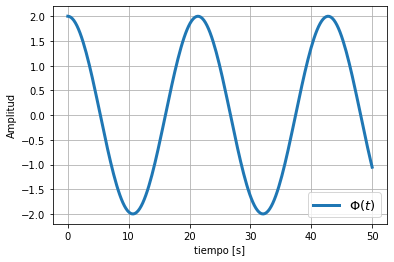

In [ ]:
w_lmao, D = metodo_matricial(10,1.5,1,2)
D_inv = np.linalg.inv(D)
t3=np.linspace(0,50,200)
A = 2 #definimos una amplitud arbitraria del modo 1
B = 3 #definimos una amplitud arbitraria del modo 2
constantes_1 = 0 
constantes_2 = 0
coso_modo_1 = A*np.cos(w_lmao[0]*t3)
coso_modo_2 = B*np.cos(w_lmao[1]*t3)
for i in range(10):
  constantes_1 += D_inv[0,i]*D[i,0] #lo que acompaña al cos(w1)
  constantes_2 += D_inv[0,i]*D[i,1] #lo que acompaña al cos(w2)

coso_phi_1 = coso_modo_1*constantes_1
coso_phi_2 = coso_modo_2*constantes_2

phi_1 = coso_phi_1+coso_phi_2 #coordenada normal 1
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")
plt.plot(t3, phi_1, lw = 3, label ="$\Phi(t)$") #grafico coord normal 1
plt.legend(loc = 4, prop={'size': 13})

#perdon por el nombre de las variables pero estabamos sin inspiración :p

Se ve como el gráfico de la coordenada normal 1 es un coseno y no una suma de ellos, por ende desacopla el sistema como queríamos probar.

#Punto 5

Vamos a plotear el movimiento de las masas 1 y 2 con los parámetros usados en el punto 4 ($\frac{ma}{mb}=1.5$).

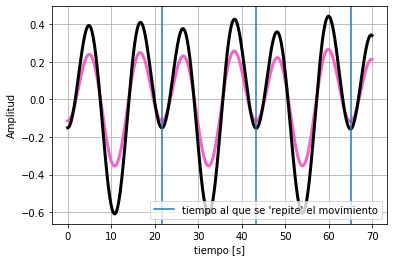

In [ ]:
A=1
t4 = np.linspace(0,70,500)
plt.plot(t4, A*np.cos(w_lmao[0]*t4)*D[0,0]+A*np.cos(w_lmao[1]*t4)*D[0,1],lw=3, color ="#F265C7")
plt.plot(t4, A*np.cos(w_lmao[0]*t4)*D[1,0]+A*np.cos(w_lmao[1]*t4)*D[1,1],lw=3, color ="black")
plt.axvline(x=21.8, label="tiempo al que se 'repite' el movimiento")
plt.axvline(x=43.4)
plt.axvline(x=65.1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(loc=4)


Notamos cierto patrón cada una osciliación y media, lo cual coincide con la relación entre la masa a y la b (luego analizaremos si esta relación es coincidencia o no). Sin embargo, vemos que la amplitud aumenta de forma leve luego de este período. Queremos ver si hay una periodicidad a tiempos más largos o si es un movimiento "aleatorio".

Text(0, 0.5, 'Amplitud')

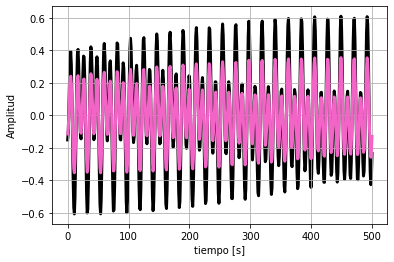

In [ ]:
t5 = np.linspace(0,500,500) #500 segundos
plt.plot(t5, A*np.cos(w_lmao[0]*t5)*D[0,0]+A*np.cos(w_lmao[1]*t5)*D[0,1],lw=3, color ="#F265C7", zorder=2)
plt.plot(t5, A*np.cos(w_lmao[0]*t5)*D[1,0]+A*np.cos(w_lmao[1]*t5)*D[1,1],lw=3, color ="black", zorder=1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")

Con 500 segundos no se llega a apreciar ninguna periodicidad aunque se ve que está estancandose el crecimineto de amplitudes. Vemos para tiempos aún más largos:

Text(0, 0.5, 'Amplitud')

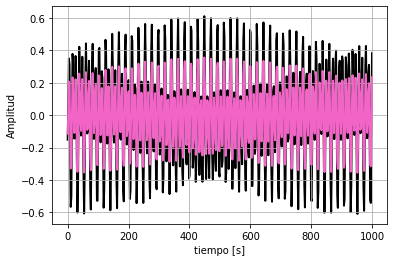

In [ ]:
t5 = np.linspace(0,1000,500) #500 segundos
plt.plot(t5, A*np.cos(w_lmao[0]*t5)*D[0,0]+A*np.cos(w_lmao[1]*t5)*D[0,1],lw=2, color ="#F265C7", zorder=2)
plt.plot(t5, A*np.cos(w_lmao[0]*t5)*D[1,0]+A*np.cos(w_lmao[1]*t5)*D[1,1],lw=2, color ="black", zorder=1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")

Text(0, 0.5, 'Amplitud')

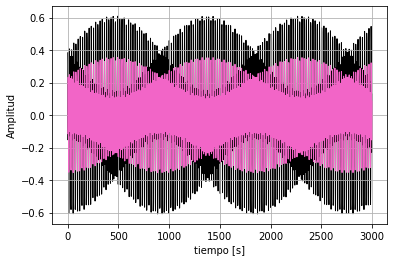

In [ ]:
t6 = np.linspace(0,3000,2000) #500 segundos
plt.plot(t6, A*np.cos(w_lmao[0]*t6)*D[0,0]+A*np.cos(w_lmao[1]*t6)*D[0,1],lw=1, color ="#F265C7", zorder=2)
plt.plot(t6, A*np.cos(w_lmao[0]*t6)*D[1,0]+A*np.cos(w_lmao[1]*t6)*D[1,1],lw=1, color ="black", zorder=1)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")

Podemos ver como ambas masas excitadas alcanzan su máximo de amplitud a la par, y esto se repite a períodos de 1000 segundos (aproximadamente 17 minutos). Vemos qué pasa al modificar solo la relación de masas ($\frac{ma}{mb}=2$):

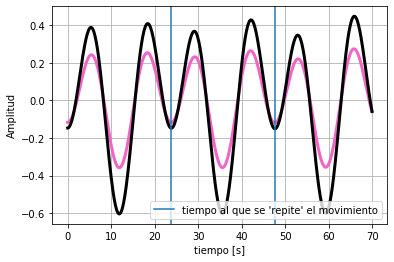

In [ ]:
ww ,vv = metodo_matricial(10,2,1,2)
t4 = np.linspace(0,70,500)
plt.plot(t4, A*np.cos(ww[0]*t4)*vv[0,0]+A*np.cos(ww[1]*t4)*vv[0,1],lw=3, color ="#F265C7")
plt.plot(t4, A*np.cos(ww[0]*t4)*vv[1,0]+A*np.cos(ww[1]*t4)*vv[1,1],lw=3, color ="black")
plt.axvline(x=23.8, label="tiempo al que se 'repite' el movimiento")
plt.axvline(x=47.6)
plt.xlabel("tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(loc=4)

Creíamos que el movimiento se repetiría cada 2 oscilaciones respetando la relación de masas pero estabamos equivocados. La única diferencia es que el patrón ocurre cada intervalos de tiempo mayores.